In [4]:
exec(open('digits_hl.py').read())

In [5]:
# try to find training parameters to get perfect performance
EPOCHS = 2000
BATCH_SIZE = 32
r_test = 0.002
all_dataset = tf.data.Dataset.from_tensor_slices((x_all, y_all))
all_dataset = all_dataset.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
make_approx_model(r=r_test)
#train_approx_model()
#check_approx_model()
#show_approx_kernels()


In [6]:
weights2 = [[[ 0, -1,  0], [ 1,  1,  1], [ 0, -1,  0]],
            [[ 0, -1,  0], [-1,  1,  1], [ 0, -1,  0]],
            [[ 0, -1,  0], [ 1,  1, -1], [ 0, -1,  0]],
            [[ 0,  1,  0], [-1,  1, -1], [ 0,  1,  0]],
            [[ 0, -1,  0], [-1,  1, -1], [ 0,  1,  0]],
            [[ 0,  1,  0], [-1,  1, -1], [ 0, -1,  0]],
            [[-1, -1,  0], [-1,  1,  1], [ 0,  1, -1]],
            [[ 0, -1, -1], [ 1,  1, -1], [-1,  1,  0]],
            [[ 0,  1, -1], [-1,  1,  1], [-1, -1,  0]],
            [[-1,  1,  0], [ 1,  1, -1], [ 0, -1, -1]],
            [[-1,  1, -1], [-1,  1,  1], [-1,  1, -1]],
            [[-1,  1, -1], [ 1,  1, -1], [-1,  1, -1]]]
bias2 = [-2, -1, -1, -2, -1, -1, -2, -2, -2, -2, -3, -3]

sk = [1,2,6]
weights2 = np.array(weights2)[sk,:].transpose((1, 2, 0)).reshape((3, 3, 1, 3))
bias2 = np.array(bias2)[sk]


0
[[-0.14183338  0.07107991 -1.2924417 ]
 [-2.6845324   1.9391218   2.652755  ]
 [-1.0214721  -4.2467723  -0.88620615]]
[[-0.98367476 -4.9329224  -2.667352  ]
 [ 2.5875318   3.0197487  -2.5873868 ]
 [-0.87904674  0.14077641  0.4553736 ]]
[[-1.3848777 -3.4059188 -0.7426452]
 [-2.1979287  2.5476968  3.016484 ]
 [-0.6030731  1.7228755 -0.8356467]]


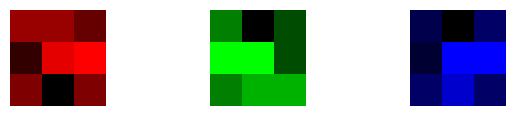

In [7]:
#make_approx_model(r=r_test)
#approx_model.layers[2].set_weights([weights2,bias2])
#show_approx_kernels()

for i in range(1):
    make_approx_model(r=r_test)
    approx_model.layers[2].set_weights([weights2,bias2])
    train_approx_model()
    print(check_approx_model())
    show_approx_kernels()

In [8]:
approx_model.evaluate(x_all, y_all)

108/108 [==============================] - 0s 1ms/step - loss: 5.9804e-07 - accuracy: 1.0000


[5.980401169836114e-07, 1.0]

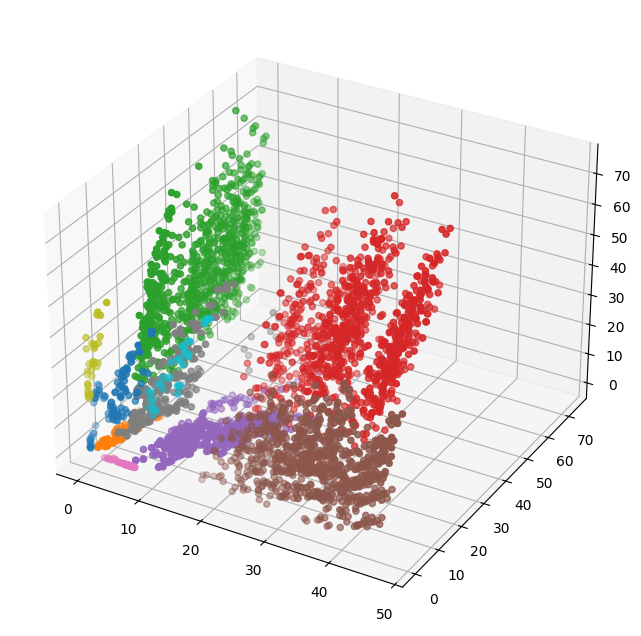

In [10]:
show_approx_embedding()

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

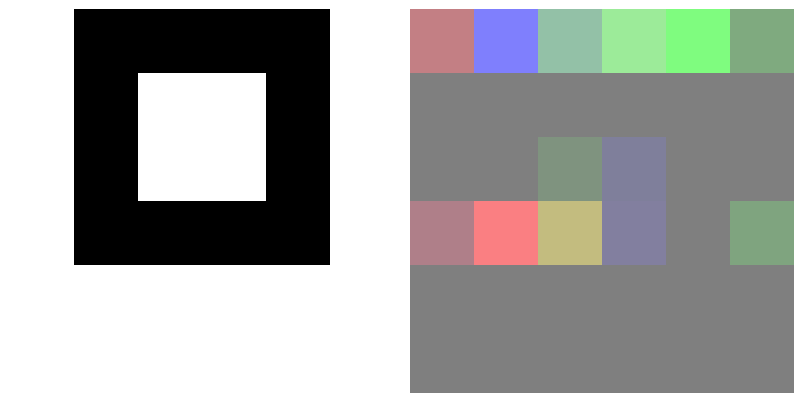

In [45]:
show_approx_features_alt(random_image())

In [48]:
from matplotlib import pyplot as plt
%matplotlib widget


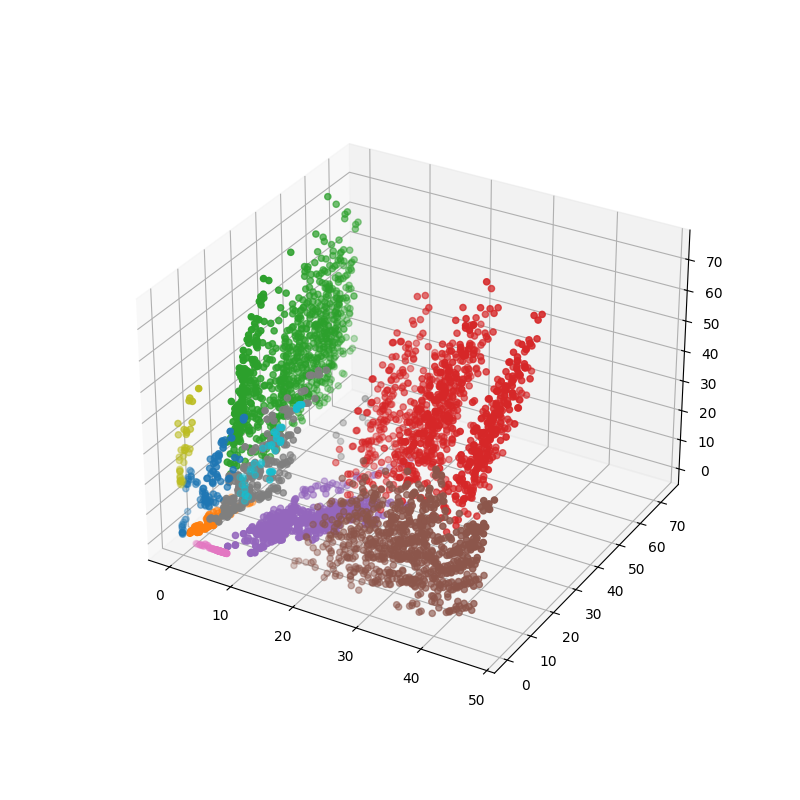

In [51]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

cols = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple",
            "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
l = approx_model.layers
for d in range(10):
    x = l[3](l[2](l[1](l[0](IM[d])))).numpy().reshape(-1, 3)
    ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c=cols[d])

def on_rotate(event):
    if hasattr(event, 'elev') and hasattr(event, 'azim'):
        ax.view_init(elev=event.elev, azim=event.azim)
        fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', on_rotate)

plt.show()